In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
columns = ['user_id','order_dt','order_product','order_amount']
df = pd.read_table('/Users/Dennis/Downloads/CDNOW_master/CDNOW_master.txt',names = columns,sep = '\s+')

In [2]:
df.head()

,user_id,order_dt,order_product,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id          69659 non-null int64
order_dt         69659 non-null int64
order_product    69659 non-null int64
order_amount     69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [4]:
df.describe()

,user_id,order_dt,order_product,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


每筆訂單訂購約2.4個商品，標準差在2.3

In [5]:
df['order_date'] = pd.to_datetime(df.order_dt , format='%Y%m%d')
df['month'] = df.order_date.apply(lambda x:x.month)

In [6]:
df.head()

,user_id,order_dt,order_product,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1
1,2,19970112,1,12.00,1997-01-12,1
2,2,19970112,5,77.00,1997-01-12,1
3,3,19970102,2,20.76,1997-01-02,1
4,3,19970330,2,20.76,1997-03-30,3


In [7]:
df.tail()

,user_id,order_dt,order_product,order_amount,order_date,month
69654,23568,19970405,4,83.74,1997-04-05,4
69655,23568,19970422,1,14.99,1997-04-22,4
69656,23569,19970325,2,25.74,1997-03-25,3
69657,23570,19970325,3,51.12,1997-03-25,3
69658,23570,19970326,2,42.96,1997-03-26,3


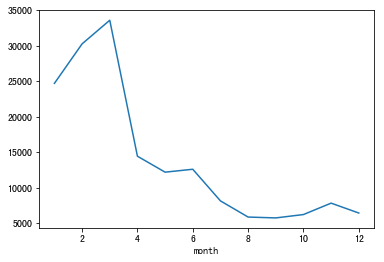

In [8]:
df.groupby(df.month).order_product.sum().plot()

前幾個月的銷量很高，後面則比較平緩，這邊我們可以假設跟用戶本身有關。

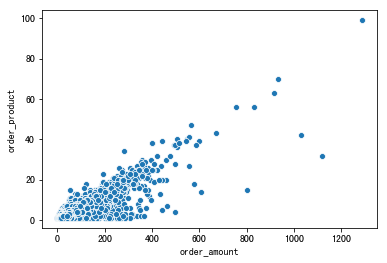

In [9]:
import seaborn as sns
sns.scatterplot(df.order_amount , df['order_product'])

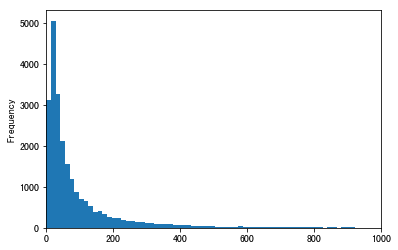

In [10]:
each_user = df.groupby(df.user_id).sum()
each_user.order_amount.plot(kind = 'hist' , bins = 1000 , xlim = (0 , 1000))

低消費的人佔大多數，值得注意的是會有大戶出現在1000的邊界之外

In [11]:
df.groupby(df.user_id).month.min().value_counts()

1    8855
2    8263
3    6452
Name: month, dtype: int64

每個用戶的最小月紀錄，可以得知他們開始使用網站的時間

In [12]:
df.groupby(df.user_id).month.max().value_counts()

2     5064
3     4900
1     4244
12    1864
11    1396
6     1084
4      987
10     961
5      870
7      813
9      718
8      669
Name: month, dtype: int64

每個用戶的最大月紀錄，可以得知他們上一次登入網頁是什麼時候
可以看出也是集中在前三個月，顯示顧客停留時間不太長，我們的趨勢可以解讀成顧客加入後很快流失

## 接下來分析複回購率

In [13]:
pivoted_count = pd.pivot_table(index=df.user_id , columns=df.month , values='order_dt', aggfunc= 'count' , data = df).fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivoted_count.columns = columns_month
pivoted_count.head()

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0


In [14]:
# 將每個月份的數據轉換一下，我們把大於1的抓出來當做有回購
pivoted_count_tran = pivoted_count.applymap(lambda x:1 if x > 1 else np.NaN if x==0 else 0 )
pivoted_count_tran.head()

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0


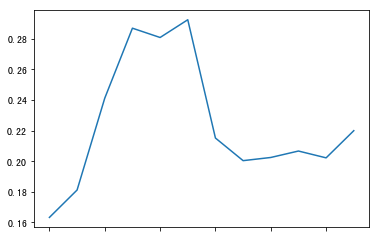

In [15]:
# 復購率，相當於有回來買的人佔總購買次數的比率
(pivoted_count_tran.sum()/ pivoted_count_tran.count()).plot()

6月開始復購率就往下掉，那基本上二月剛開始的時候復購率上升非常快
猜測可能是某些商品的促銷期間，加上這些商品類型應該屬於季節性的

In [16]:
pivot_amount = pd.pivot_table(index=df.user_id , columns= 'month' , values='order_amount' ,aggfunc='mean' ,data= df)
pivot_amount.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1,11.770000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20.760000,NaN,20.76,19.54,16.99,NaN,NaN,NaN,NaN,NaN,39.205,NaN
4,29.530000,NaN,NaN,NaN,NaN,NaN,NaN,14.96,NaN,NaN,NaN,26.480
5,26.923333,38.9,NaN,45.55,38.71,26.14,28.14,NaN,40.47,NaN,NaN,43.465


In [31]:
pivoted_purchase = pivot_amount.applymap(lambda x: 1 if x > 0 else 0 )
pivoted_purchase.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1
5,1,1,0,1,1,1,1,0,1,0,0,1


In [32]:
pivoted_purchase.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

In [35]:
pivoted_count = pd.pivot_table(index=df.user_id , columns=df.month , values='order_dt', aggfunc= 'count' , data = df).fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivoted_count.columns = columns_month
pivoted_count.head()

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0


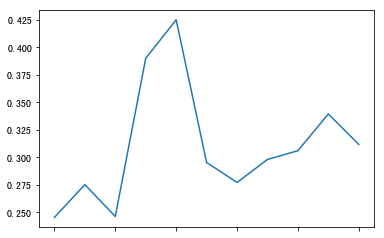

In [37]:
def purchase_return(user):
    status = []
    for i in range(11):
        if user[i] >=1:
            if user[i + 1] >= 1:
                status.append(1)
            else:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status , index=columns_month)

pivoted_purchase_return = pivoted_count.apply(purchase_return,axis=1) 
(pivoted_purchase_return.sum()/pivoted_purchase_return.count()).plot()

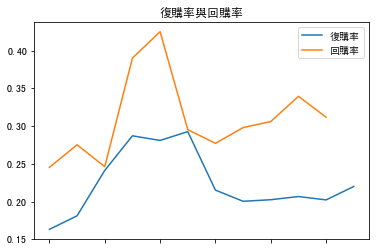

In [26]:
(pivoted_count_tran.sum()/ pivoted_count_tran.count()).plot(label= '復購率')
plt.title('復購率與回購率')
(pivoted_purchase_return.sum()/pivoted_purchase_return.count()).plot(label='回購率')
plt.legend()

由此可以看出回購率比復購率好，顯示老客戶的價值比新客戶還好，是CDNow網站的用戶行為特徵。
顯示用戶的品牌忠誠度並不高

In [40]:
def active_status(user):
    status = []
    for i in range(11):
        if user[i] == 0:
            if len(status) > 0:
                if status[i - 1] =='unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        else:
            if len(status) ==0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status , index=columns_month)

In [48]:
for i in range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9


In [60]:
def active_status(user):
    status = ['new']   
    for i in range(1,12):
        if user[i] == 0: #1月沒登入
            if len(status) > 0:  #1月以後
                if status[i-1] == 'unreg': #未註冊
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status,index = columns_month)
pivoted_purchase_status = pivoted_purchase.apply(active_status , axis = 1)
pivoted_purchase_status.head()

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,active,unactive,return,active,active,unactive,unactive,unactive,unactive,unactive,return
4,new,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive
5,new,active,active,unactive,return,active,active,active,unactive,return,unactive,unactive


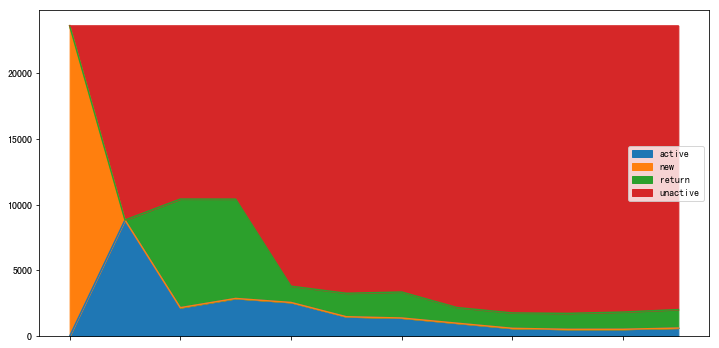

In [57]:
purchase_status_counts = pivoted_purchase_status.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_status_counts
purchase_status_counts.fillna(0).T.plot.area(figsize = (12,6))

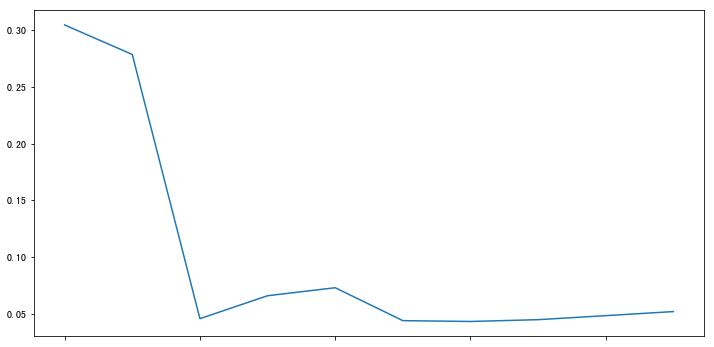

In [58]:
return_rate = purchase_status_counts.apply(lambda x:x/x.sum(),axis = 1)
return_rate.loc['return'].plot(figsize = (12,6)) 

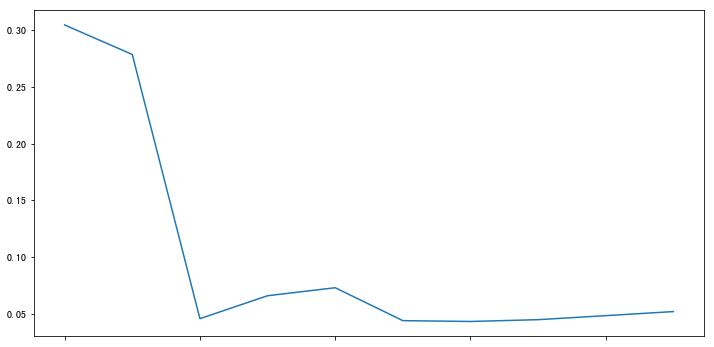

In [59]:
return_rate.loc['return'].plot(figsize = (12,6))

In [62]:
data = df
user_amount = data.groupby('user_id').order_amount.sum().sort_values().reset_index()
user_amount
user_amount['amount_cumsum'] = user_amount.order_amount.cumsum()
user_amount
amount_total = user_amount.amount_cumsum.max()  
user_amount['prop'] = user_amount.apply(lambda x:x.amount_cumsum/amount_total,axis =1)
user_amount.tail()

,user_id,order_amount,amount_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


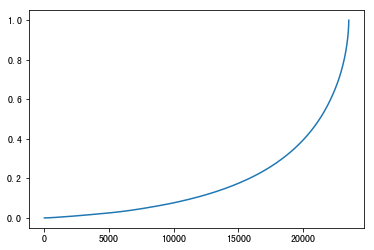

In [63]:
user_amount.prop.plot()

In [64]:
user_purchase = data[['user_id','order_product','order_amount','order_date']]
order_date_min = user_purchase.groupby('user_id').order_date.min()
order_date_max = user_purchase.groupby('user_id').order_date.max()
(order_date_max - order_date_min).head(10)

user_id
1      0 days
2      0 days
3    511 days
4    345 days
5    367 days
6      0 days
7    445 days
8    452 days
9    523 days
10     0 days
Name: order_date, dtype: timedelta64[ns]

In [65]:
(order_date_max- order_date_min).mean()

Timedelta('134 days 20:55:36.987696')

用戶的平均生命週期

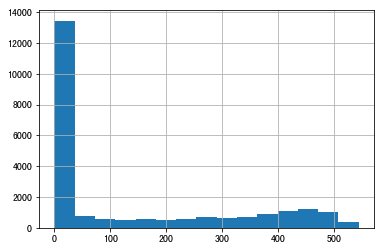

In [66]:
((order_date_max - order_date_min)/np.timedelta64(1,'D')).hist(bins = 15)

In [67]:
life_time = (order_date_max - order_date_min).reset_index()
life_time.head()

,user_id,order_date
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


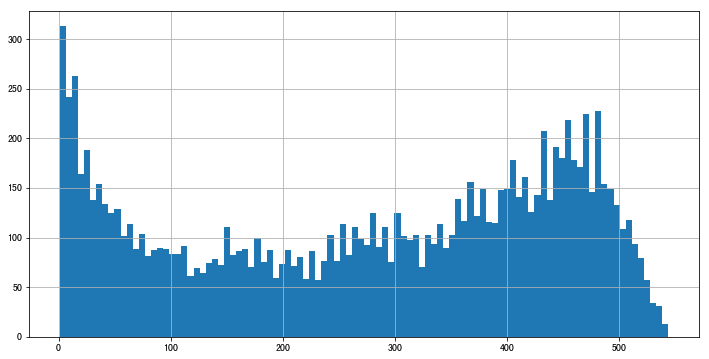

In [68]:
life_time['life_time'] = life_time.order_date/np.timedelta64(1,'D')
life_time[life_time.life_time > 0].life_time.hist( bins = 100,figsize = (12,6))

高價值用戶基本上是超過400天才會平穩，

In [69]:
life_time[life_time.life_time>0].life_time.mean()

276.0448072247308

消費兩次以上的用戶平均生命週期為276天左右

## 計算客戶留存率

In [71]:
user_purchase_retention = pd.merge(left = user_purchase,right = order_date_min.reset_index(),how = 'inner',on = 'user_id',suffixes = ('','_min'))
user_purchase_retention.head(10)

,user_id,order_product,order_amount,order_date,order_date_min
0,1,1,11.77,1997-01-01,1997-01-01
1,2,1,12.00,1997-01-12,1997-01-12
2,2,5,77.00,1997-01-12,1997-01-12
3,3,2,20.76,1997-01-02,1997-01-02
4,3,2,20.76,1997-03-30,1997-01-02
5,3,2,19.54,1997-04-02,1997-01-02
6,3,5,57.45,1997-11-15,1997-01-02
7,3,4,20.96,1997-11-25,1997-01-02
8,3,1,16.99,1998-05-28,1997-01-02
9,4,2,29.33,1997-01-01,1997-01-01


In [72]:
user_purchase_retention['order_date_diff'] = user_purchase_retention.order_date - user_purchase_retention.order_date_min
user_purchase_retention.head()

,user_id,order_product,order_amount,order_date,order_date_min,order_date_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days
1,2,1,12.00,1997-01-12,1997-01-12,0 days
2,2,5,77.00,1997-01-12,1997-01-12,0 days
3,3,2,20.76,1997-01-02,1997-01-02,0 days
4,3,2,20.76,1997-03-30,1997-01-02,87 days


In [74]:
date_trans = lambda x:x/np.timedelta64(1,'D')
user_purchase_retention['date_diff'] = user_purchase_retention.order_date_diff.apply(date_trans)
user_purchase_retention.head(10)
bin = [0,3,5,7,15,30,60,90,180,365]
user_purchase_retention['date_diff_bin'] = pd.cut(user_purchase_retention.date_diff,bins = bin)
user_purchase_retention.head(20)
pivoted_retention = user_purchase_retention.pivot_table(index = 'user_id',columns = 'date_diff_bin',values = 'order_amount',aggfunc = sum)
pivoted_retention.head(10)

date_diff_bin,"(0, 3]","(3, 5]","(5, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,40.30,NaN,78.41
4,NaN,NaN,NaN,NaN,29.73,NaN,NaN,NaN,41.44
5,NaN,NaN,NaN,13.97,NaN,38.90,NaN,110.40,155.54
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.43
8,NaN,NaN,NaN,NaN,NaN,13.97,NaN,45.29,104.17
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.33,NaN
11,NaN,NaN,NaN,NaN,19.30,NaN,12.77,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.10
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.77,NaN


In [75]:
pivoted_retention = user_purchase_retention.pivot_table(index = 'user_id',columns = 'date_diff_bin',values = 'order_amount',aggfunc = sum)
pivoted_retention.head(10)

date_diff_bin,"(0, 3]","(3, 5]","(5, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,40.30,NaN,78.41
4,NaN,NaN,NaN,NaN,29.73,NaN,NaN,NaN,41.44
5,NaN,NaN,NaN,13.97,NaN,38.90,NaN,110.40,155.54
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.43
8,NaN,NaN,NaN,NaN,NaN,13.97,NaN,45.29,104.17
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.33,NaN
11,NaN,NaN,NaN,NaN,19.30,NaN,12.77,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.10
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.77,NaN


In [76]:
pivoted_retention.mean()

date_diff_bin
(0, 3]        35.905798
(3, 5]        36.225332
(5, 7]        34.622935
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

In [77]:
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x :1 if x>0 else 0)
pivoted_retention_trans.head()

date_diff_bin,"(0, 3]","(3, 5]","(5, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,,
3,0,0,0,0,0,0,1,0,1
4,0,0,0,0,1,0,0,0,1
5,0,0,0,1,0,1,0,1,1
7,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,1,0,1,1


In [78]:
def diff(group):
    d = group.date_diff - group.date_diff.shift(-1)
    return d
last_diff = user_purchase_retention.groupby('user_id').apply(diff)
last_diff.head()

user_id   
1        0     NaN
2        1     0.0
         2     NaN
3        3   -87.0
         4    -3.0
Name: date_diff, dtype: float64

In [79]:
last_diff.mean()

-68.97376814424265

由此可知用戶的平均購買週期大約為68天，也就是說差不多兩個月我們就要進行一次客戶挽回活動

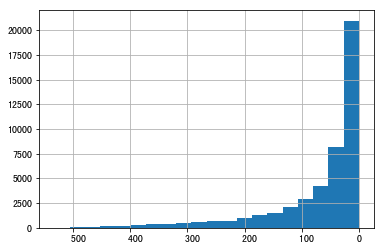

In [80]:
last_diff.hist(bins = 20)